In [1]:
%matplotlib inline

import glob
import uproot
import pprint
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 24})
plt.rcParams['text.usetex'] = True
lw = 2
xyLabelFontSize = 24
xLabelPad = 6
yLabelPad = 10

pp = pprint.PrettyPrinter()
folder = '/ceph/aissac/ntuple_for_graphs/prod_2018_v2_processed_v5_THESIS/trimmed_200000_and_cut_puppiWeightNoLep_greater_0_and_deltaR_smaller_0point5'
files = glob.glob(f"{folder}" + "/**/*.root", recursive=True)
files = [file for file in files if "DYJetsToLL_M-50" in file]

files = [file + ':taus' for file in files if "taus" in file or "jets" in file]
pp.pprint(files)


#testfile = f'{folder}/DYJetsToLL_M-50_taus.root:taus'

ttree = uproot.open(files[0])
print("")

pp.pprint(f'keys: {ttree.keys()}')
print("")

#pp.pprint(f'values: {ttree.values()}')
print("")

pp.pprint(ttree.show())

['/ceph/aissac/ntuple_for_graphs/prod_2018_v2_processed_v5_THESIS/trimmed_200000_and_cut_puppiWeightNoLep_greater_0_and_deltaR_smaller_0point5/DYJetsToLL_M-50_taus.root:taus',
 '/ceph/aissac/ntuple_for_graphs/prod_2018_v2_processed_v5_THESIS/trimmed_200000_and_cut_puppiWeightNoLep_greater_0_and_deltaR_smaller_0point5/DYJetsToLL_M-50_jets.root:taus']

("keys: ['tau_byDeepTau2017v2p1VSjetraw', 'tau_byDeepTau2017v2p1VSjet', "
 "'tau_byDeepTau2017v2p1VSeraw', 'tau_byDeepTau2017v2p1VSe', "
 "'tau_byDeepTau2017v2p1VSmuraw', 'tau_byDeepTau2017v2p1VSmu', "
 "'pfCand_deltaEta', 'pfCand_phi', 'pfCand_eta', 'pfCand_jetDaughter', "
 "'pfCand_deltaPhi', 'pfCand_particleType', 'pfCand_mass', 'pfCand_deltaR', "
 "'pfCand_pt', 'pfCand_puppiWeightNoLep', 'pfCand_charge']")


name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
tau_byDeepTau2017... | float                    | AsDtype('>f4')
tau_

pfCand_deltaPhi = ttree['pfCand_deltaPhi'].array()
nNodes = np.array([len(x) for x in pfCand_deltaPhi])
nEdges = np.array([x*(x-1) for x in nNodes])
pfCand_deltaPhi = ak.flatten(pfCand_deltaPhi, axis=None)
pfCand_deltaEta = ak.flatten(ttree['pfCand_deltaEta'].array(), axis=None)
pfCand_deltaR = ak.flatten(ttree['pfCand_deltaR'].array(), axis=None)
pfCand_pt = ak.flatten(ttree['pfCand_pt'].array(), axis=None)
pfCand_mass = ak.flatten(ttree['pfCand_mass'].array(), axis=None)

print(f'graph count: {len(nNodes)}')

print(f'Max node count: {max(nNodes)}')
print(f'Min node count: {min(nNodes)}')

print(f'Max edge count: {max(nEdges)}')
print(f'Min edge count: {min(nEdges)}')

In [2]:
def getBinsByPercentile(arrayDict, nBins, maxPercentile=99):
    minVal = 999999999999
    maxVal = -999999999999
    for arr in arrayDict.values():
        p = np.percentile(arr, [0, maxPercentile])
        minVal = p[0] if p[0] < minVal else minVal
        maxVal = p[1] if p[1] > maxVal else maxVal
    binWidth = (maxVal - minVal) / nBins
    
    while(binWidth.is_integer() == False):
        maxVal += 1
        binWidth = (maxVal-minVal) / nBins
    
    return np.linspace(minVal, maxVal, nBins+1)

def integrateHisto(data, bins):
    hist, bin_edges = np.histogram(data["Genuine taus"], bins=bins, density=True)
    print(f'genuine taus: {np.sum(hist * np.diff(bin_edges))}')

    hist, bin_edges = np.histogram(data["Jets"], bins=bins, density=True)
    print(f'jets: {np.sum(hist * np.diff(bin_edges))}')

In [3]:
nBins = 25
baseFileName = "DYJetsToLL_M-50_puppiAndDeltaRCut"
tree = { "Genuine taus" : uproot.open(files[0]), "Jets" : uproot.open(files[0])}
genuine = uproot.open(files[0])
jets = uproot.open(files[1])

pfCand_deltaPhi = {
    "Genuine taus" : genuine["pfCand_deltaPhi"].array(),
    "Jets" : jets["pfCand_deltaPhi"].array()
}

nNodes = {
    "Genuine taus" : np.array([len(x) for x in pfCand_deltaPhi["Genuine taus"]]),
    "Jets" : np.array([len(x) for x in pfCand_deltaPhi["Jets"]])
}

nEdges = {
    "Genuine taus" : np.array([x*(x-1) for x in nNodes["Genuine taus"]]),
    "Jets" : np.array([x*(x-1) for x in nNodes["Jets"]])
}

pfCand_deltaPhi = {
    "Genuine taus" : ak.to_numpy(ak.flatten(genuine["pfCand_deltaPhi"].array(), axis=None)),
    "Jets" : ak.to_numpy(ak.flatten(jets["pfCand_deltaPhi"].array(), axis=None))
}

pfCand_deltaEta = {
    "Genuine taus" : ak.to_numpy(ak.flatten(genuine["pfCand_deltaEta"].array(), axis=None)),
    "Jets" : ak.to_numpy(ak.flatten(jets["pfCand_deltaEta"].array(), axis=None))
}

pfCand_deltaR = {
    "Genuine taus" : ak.to_numpy(ak.flatten(genuine["pfCand_deltaR"].array(), axis=None)),
    "Jets" : ak.to_numpy(ak.flatten(jets["pfCand_deltaR"].array(), axis=None))
}

pfCand_pt = {
    "Genuine taus" : ak.to_numpy(ak.flatten(genuine["pfCand_pt"].array(), axis=None)),
    "Jets" : ak.to_numpy(ak.flatten(jets["pfCand_pt"].array(), axis=None))
}

pfCand_eta = {
    "Genuine taus" : ak.to_numpy(ak.flatten(genuine["pfCand_eta"].array(), axis=None)),
    "Jets" : ak.to_numpy(ak.flatten(jets["pfCand_eta"].array(), axis=None))
}

pfCand_phi = {
    "Genuine taus" : ak.to_numpy(ak.flatten(genuine["pfCand_phi"].array(), axis=None)),
    "Jets" : ak.to_numpy(ak.flatten(jets["pfCand_phi"].array(), axis=None))
}

pfCand_mass = {
    "Genuine taus" : ak.to_numpy(ak.flatten(genuine["pfCand_mass"].array(), axis=None)),
    "Jets" : ak.to_numpy(ak.flatten(jets["pfCand_mass"].array(), axis=None))
}

pfCand_charge = {
    "Genuine taus" : ak.to_numpy(ak.flatten(genuine["pfCand_charge"].array(), axis=None)),
    "Jets" : ak.to_numpy(ak.flatten(jets["pfCand_charge"].array(), axis=None))
}

pfCand_particleType = {
    "Genuine taus" : ak.to_numpy(ak.flatten(genuine["pfCand_particleType"].array(), axis=None)),
    "Jets" : ak.to_numpy(ak.flatten(jets["pfCand_particleType"].array(), axis=None))
}

In [ ]:
bins = getBinsByPercentile(nNodes, nBins)

fig, ax = plt.subplots(figsize=(9,7))
ax.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
               bottom=True, top=True, left=True, right=True, length=7, pad=7, which='major', direction='in')

ax.hist(nNodes["Genuine taus"], bins=bins, label="Genuine taus", histtype="step", linewidth=lw, density=True)
ax.hist(nNodes["Jets"], bins=bins, label="Jets", histtype="step", linewidth=lw, density=True)
ax.set_xlabel(r"$\displaystyle N_{\mathrm{PFCandidates}}$", loc='right', labelpad=xLabelPad, fontsize=xyLabelFontSize)
ax.set_ylabel(r"$\displaystyle\frac{\mathrm{d}N}{\mathrm{d}N_{\mathrm{PFCandidates}}}$", loc='top', labelpad=yLabelPad, fontsize=xyLabelFontSize)
ax.legend()
plt.tight_layout()
plt.savefig(f'{baseFileName}_NodeCount.pdf')
plt.show()

In [ ]:
bins = getBinsByPercentile(nNodes, nBins)

integrateHisto(nNodes, bins)

In [ ]:
bins = np.linspace(0, 1000, 51)
print(bins)

fig, ax = plt.subplots(figsize=(9,7))
ax.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
               bottom=True, top=True, left=True, right=True, length=7, pad=7, which='major', direction='in')

ax.hist(nEdges["Genuine taus"], bins=bins, range=(0,1200),label="Genuine taus", histtype="step", linewidth=lw, density=True)
ax.hist(nEdges["Jets"], bins=bins, range=(0,1200), label="Jets", histtype="step", linewidth=lw, density=True)
ax.set_xlabel(r"$\displaystyle M$", loc='right', labelpad=xLabelPad, fontsize=xyLabelFontSize)
ax.set_ylabel(r"$\displaystyle\frac{\mathrm{d}N}{\mathrm{d}M}$", loc='top', labelpad=yLabelPad, fontsize=xyLabelFontSize)
ax.legend()
plt.tight_layout()
plt.savefig(f'{baseFileName}_EdgeCount.pdf')
plt.show()

In [ ]:
"""
BINNING EFFECT due to fully conntected graphs:
there are only the computed combinations of edge counts possible for fully connected graphs
-> histogram binning will have empty bins for example using this binning:
bins = np.linspace(0, 1000, 51)
[   0.   20.   40.   60.   80.  100.  120.  140.  160.  180.  200.  220.
  240.  260.  280.  300.  320.  340.  360.  380.  400.  420.  440.  460.
  480.  500.  520.  540.  560.  580.  600.  620.  640.  660.  680.  700.
  720.  740.  760.  780.  800.  820.  840.  860.  880.  900.  920.  940.
  960.  980. 1000.]

since 13*12=156 and 14*13=182 -> there are no entries in the bin [160,180]! -> gap.
"""

possibleEdges = []
for i in range(2, 51):
    print(f'{i}*{i-1}={i*(i-1)}')
    possibleEdges.append(i*(i-1))

bins = np.linspace(0, 1000, 51)
    
fig, ax = plt.subplots(figsize=(9,7))
ax.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
               bottom=True, top=True, left=True, right=True, length=7, pad=7, which='major', direction='in')

ax.hist(possibleEdges, bins=bins, range=(0,1200),label="Edges", histtype="step", linewidth=lw, density=True)
ax.set_xlabel(r"$\displaystyle N_{\mathrm{Edges}}$", loc='right', labelpad=xLabelPad, fontsize=xyLabelFontSize)
ax.set_ylabel(r"$\displaystyle\frac{\mathrm{d}N}{\mathrm{d}N_{\mathrm{Edges}}}$", loc='top', labelpad=yLabelPad, fontsize=xyLabelFontSize)
ax.legend()
plt.tight_layout()
plt.show()

In [ ]:
bins = np.linspace(0, 1000, 51)
print(bins)

integrateHisto(nEdges, bins)

In [ ]:
fig, ax = plt.subplots(figsize=(9,7))
ax.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
               bottom=True, top=True, left=True, right=True, length=7, pad=7, which='major', direction='in')

ax.hist(pfCand_deltaPhi["Genuine taus"], bins=nBins, label="Genuine taus", histtype="step", linewidth=lw, density=True)
ax.hist(pfCand_deltaPhi["Jets"], bins=nBins, label="Jets", histtype="step", linewidth=lw, density=True)
ax.set_xlabel(r"$\displaystyle\Delta \phi\,(\mathrm{rad})$", loc='right', labelpad=xLabelPad, fontsize=xyLabelFontSize)
ax.set_ylabel(r"$\displaystyle\frac{\mathrm{d}N}{\mathrm{d}\Delta\phi}\,(\mathrm{rad}^{-1})$", loc='top', labelpad=yLabelPad, fontsize=xyLabelFontSize)
ax.legend()
plt.tight_layout()
plt.savefig(f'{baseFileName}_pfCand_deltaPhi.pdf')
plt.show()

In [ ]:
integrateHisto(pfCand_deltaPhi, nBins)

In [ ]:
fig, ax = plt.subplots(figsize=(9,7))
ax.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
               bottom=True, top=True, left=True, right=True, length=7, pad=7, which='major', direction='in')
#ax.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
#               bottom=True, top=True, left=True, right=True, length=3, which='minor')
#ax.minorticks_on()

ax.hist(pfCand_deltaEta["Genuine taus"], bins=nBins, label="Genuine taus", histtype="step", linewidth=lw, density=True)
ax.hist(pfCand_deltaEta["Jets"], bins=nBins, label="Jets", histtype="step", linewidth=lw, density=True)
ax.set_xlabel(r"$\displaystyle\Delta \eta$", loc='right', labelpad=xLabelPad, fontsize=xyLabelFontSize)
ax.set_ylabel(r"$\displaystyle\frac{\mathrm{d}N}{\mathrm{d}\Delta \eta}$", loc='top', labelpad=yLabelPad, fontsize=xyLabelFontSize)
ax.legend()
plt.tight_layout()
plt.savefig(f'{baseFileName}_pfCand_deltaEta.pdf')
plt.show()

In [ ]:
integrateHisto(pfCand_deltaEta, nBins)

In [ ]:
fig, ax = plt.subplots(figsize=(9,7))
ax.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
               bottom=True, top=True, left=True, right=True, length=7, pad=7, which='major', direction='in')

ax.hist(pfCand_deltaR["Genuine taus"], bins=nBins, label="Genuine taus", histtype="step", linewidth=lw, density=True)
ax.hist(pfCand_deltaR["Jets"], bins=nBins, label="Jets", histtype="step", linewidth=lw, density=True)
ax.set_xlabel(r"$\displaystyle\Delta R$", loc='right', labelpad=xLabelPad, fontsize=xyLabelFontSize)
ax.set_ylabel(r"$\displaystyle\frac{\mathrm{d}N}{\mathrm{d}\Delta R}$", loc='top', labelpad=yLabelPad, fontsize=xyLabelFontSize)
ax.legend()
plt.tight_layout()
plt.savefig(f'{baseFileName}_pfCand_deltaR.pdf')
plt.show()

In [ ]:
integrateHisto(pfCand_deltaR, nBins)

In [ ]:
fig, ax = plt.subplots(figsize=(9,7))
ax.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
               bottom=True, top=True, left=True, right=True, length=7, pad=7, which='major', direction='in')

ax.hist(pfCand_pt["Genuine taus"], bins=nBins, range=(0, 900), log=True, label="Genuine taus", histtype="step", linewidth=lw, density=True)
ax.hist(pfCand_pt["Jets"], bins=nBins, range=(0, 900), log=True, label="Jets", histtype="step", linewidth=lw, density=True)
ax.set_xlabel(r"$p_{\mathrm{T}}\,(\mathrm{GeV})$", loc='right', labelpad=xLabelPad, fontsize=xyLabelFontSize)
ax.set_ylabel(r"$\displaystyle\frac{\mathrm{d}N}{\mathrm{d}p_{\mathrm{T}}}\,(\mathrm{GeV}^{-1})$", loc='top', labelpad=yLabelPad, fontsize=xyLabelFontSize)
ax.legend()
plt.tight_layout()
plt.savefig(f'{baseFileName}_pfCand_pt.pdf')
plt.show()

In [ ]:
integrateHisto(pfCand_pt, nBins)

In [ ]:
fig, ax = plt.subplots(figsize=(9,7))
ax.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
               bottom=True, top=True, left=True, right=True, length=7, pad=7, which='major', direction='in')

ax.hist(pfCand_eta["Genuine taus"], bins=nBins, label="Genuine taus", histtype="step", linewidth=lw, density=True)
ax.hist(pfCand_eta["Jets"], bins=nBins, label="Jets", histtype="step", linewidth=lw, density=True)
ax.set_xlabel(r"$\eta$", loc='right', labelpad=xLabelPad, fontsize=xyLabelFontSize)
ax.set_ylabel(r"$\displaystyle\frac{\mathrm{d}N}{\mathrm{d}\eta}$", loc='top', labelpad=yLabelPad, fontsize=xyLabelFontSize)
ax.legend()
plt.tight_layout()
plt.savefig(f'{baseFileName}_pfCand_eta.pdf')
plt.show()

In [ ]:
integrateHisto(pfCand_eta, nBins)

In [ ]:
fig, ax = plt.subplots(figsize=(9,7))
ax.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
               bottom=True, top=True, left=True, right=True, length=7, pad=7, which='major', direction='in')

ax.hist(pfCand_phi["Genuine taus"], bins=nBins, label="Genuine taus", histtype="step", linewidth=lw, density=True)
ax.hist(pfCand_phi["Jets"], bins=nBins, label="Jets", histtype="step", linewidth=lw, density=True)
ax.set_xlabel(r"$\phi\,(\mathrm{rad})$", loc='right', labelpad=xLabelPad, fontsize=xyLabelFontSize)
ax.set_ylabel(r"$\displaystyle\frac{\mathrm{d}N}{\mathrm{d}\phi}\,(\mathrm{rad}^{-1})$", loc='top', labelpad=yLabelPad, fontsize=xyLabelFontSize)
ax.legend(loc="lower right")
plt.tight_layout()
plt.savefig(f'{baseFileName}_pfCand_phi.pdf')
plt.show()

In [ ]:
integrateHisto(pfCand_phi, nBins)

In [ ]:
fig, ax = plt.subplots(figsize=(9,7))
ax.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
               bottom=True, top=True, left=True, right=True, length=7, pad=7, which='major', direction='in')

ax.hist(pfCand_mass["Genuine taus"], bins=nBins, range=(-0.4, 0.5), log=True, label="Genuine taus", histtype="step", linewidth=lw, density=True)
ax.hist(pfCand_mass["Jets"], bins=nBins, range=(-0.4, 0.5), log=True, label="Jets", histtype="step", linewidth=lw, density=True)
ax.set_xlabel(r"$m$", loc='right', labelpad=xLabelPad, fontsize=xyLabelFontSize)
ax.set_ylabel(r"$\displaystyle\frac{\mathrm{d}N}{\mathrm{d}m}$", loc='top', labelpad=yLabelPad, fontsize=xyLabelFontSize)
ax.legend()
plt.tight_layout()
plt.savefig(f'{baseFileName}_pfCand_mass.pdf')
plt.show()

In [ ]:
integrateHisto(pfCand_mass, nBins)

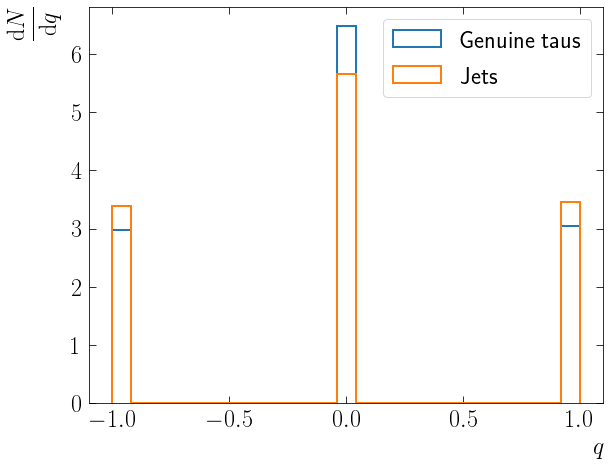

In [11]:
fig, ax = plt.subplots(figsize=(9,7))
ax.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
               bottom=True, top=True, left=True, right=True, length=7, pad=7, which='major', direction='in')
bins = np.arange(-2,2 + 1.5) - 0.5
ax.hist(pfCand_charge["Genuine taus"], bins=bins, label="Genuine taus", histtype="step", linewidth=lw, density=True)
ax.hist(pfCand_charge["Jets"], bins=nBins, label="Jets", histtype="step", linewidth=lw, density=True)
ax.set_xlabel(r"$q$", loc='right', labelpad=xLabelPad, fontsize=xyLabelFontSize)
ax.set_ylabel(r"$\displaystyle\frac{\mathrm{d}N}{\mathrm{d}q}$", loc='top', labelpad=yLabelPad, fontsize=xyLabelFontSize)
ax.legend()
plt.tight_layout()
plt.savefig(f'{baseFileName}_pfCand_charge.pdf')
plt.show()

In [ ]:
integrateHisto(pfCand_charge, nBins)

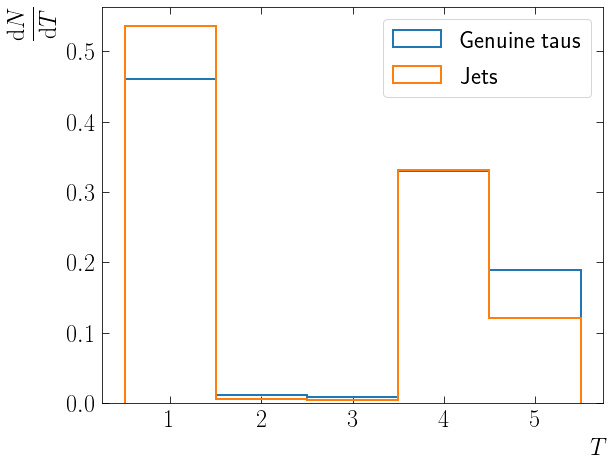

In [10]:
fig, ax = plt.subplots(figsize=(9,7))
ax.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
               bottom=True, top=True, left=True, right=True, length=7, pad=7, which='major', direction='in')
bins = np.arange(1,5 + 1.5) - 0.5
ax.hist(pfCand_particleType["Genuine taus"], bins=bins, label="Genuine taus", histtype="step", linewidth=lw, density=True)
ax.hist(pfCand_particleType["Jets"], bins=bins, label="Jets", histtype="step", linewidth=lw, density=True)
ax.set_xlabel(r"$T$", loc='right', labelpad=xLabelPad, fontsize=xyLabelFontSize)
ax.set_ylabel(r"$\displaystyle\frac{\mathrm{d}N}{\mathrm{d}T}$", loc='top', labelpad=yLabelPad, fontsize=xyLabelFontSize)
ax.legend()
plt.tight_layout()
plt.savefig(f'{baseFileName}_pfCand_particleType.pdf')
plt.show()

In [ ]:
integrateHisto(pfCand_particleType, nBins)

In [ ]:
fig, ax = plt.subplots(figsize=(9,7))
ax.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
               bottom=True, top=True, left=True, right=True, length=7, pad=7, which='major', direction='in')

counts, xedges, yedges, im = ax.hist2d(pfCand_eta["Genuine taus"], pfCand_phi["Genuine taus"], bins=[nBins, nBins])
ax.set_xlabel(r"$\displaystyle\eta$", loc='right', labelpad=xLabelPad, fontsize=xyLabelFontSize)
ax.set_ylabel(r"$\displaystyle\phi$", loc='top', labelpad=yLabelPad, fontsize=xyLabelFontSize)
fig.colorbar(im, ax=ax)
plt.tight_layout()
plt.savefig(f'{baseFileName}_pfCand_eta_phi_genuinetaus_2Dhist.png')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(9,7))
ax.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
               bottom=True, top=True, left=True, right=True, length=7, pad=7, which='major', direction='in')

counts, xedges, yedges, im = ax.hist2d(pfCand_eta["Jets"], pfCand_phi["Jets"], bins=[nBins, nBins])
ax.set_xlabel(r"$\displaystyle\eta$", loc='right', labelpad=xLabelPad, fontsize=xyLabelFontSize)
ax.set_ylabel(r"$\displaystyle\phi$", loc='top', labelpad=yLabelPad, fontsize=xyLabelFontSize)
fig.colorbar(im, ax=ax)
plt.tight_layout()
plt.savefig(f'{baseFileName}_pfCand_eta_phi_jets_2Dhist.png')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(9,7))
ax.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
               bottom=True, top=True, left=True, right=True, length=7, pad=7, which='major', direction='in')

counts, xedges, yedges, im = ax.hist2d(pfCand_deltaEta["Genuine taus"], pfCand_deltaPhi["Genuine taus"], bins=[nBins, nBins])
ax.set_xlabel(r"$\displaystyle\Delta\eta$", loc='right', labelpad=xLabelPad, fontsize=xyLabelFontSize)
ax.set_ylabel(r"$\displaystyle\Delta\phi$", loc='top', labelpad=yLabelPad, fontsize=xyLabelFontSize)
fig.colorbar(im, ax=ax)
plt.tight_layout()
plt.savefig(f'{baseFileName}_pfCand_deltaEta_deltaPhi_genuinetaus_2Dhist.png')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(9,7))
ax.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
               bottom=True, top=True, left=True, right=True, length=7, pad=7, which='major', direction='in')

counts, xedges, yedges, im = ax.hist2d(pfCand_deltaEta["Jets"], pfCand_deltaPhi["Jets"], bins=[nBins, nBins])
ax.set_xlabel(r"$\displaystyle\Delta\eta$", loc='right', labelpad=xLabelPad, fontsize=xyLabelFontSize)
ax.set_ylabel(r"$\displaystyle\Delta\phi$", loc='top', labelpad=yLabelPad, fontsize=xyLabelFontSize)
fig.colorbar(im, ax=ax)
plt.tight_layout()
plt.savefig(f'{baseFileName}_pfCand_deltaEta_deltaPhi_jets_2Dhist.png')
plt.show()